# Importación de módulos

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# comando para hacer que las gráficas aparezcan en el notebook
%matplotlib inline 

# Carga de datos

In [6]:
data = pd.read_csv('./ais_data.csv',index_col=0)

# Inspeccionamos el tamaño del set de datos
En este caso se tienen 358351 registros y 9 columnas

In [8]:
data.shape

(358351, 9)

# Primera visualización de los datos

In [9]:
data.head()

,mmsi,navigationalstatus,sog,cog,heading,shiptype,width,length,draught
0,219019621,Unknown value,0.0,86.0,86.0,Fishing,4.0,9.0,NaN
1,265628170,Unknown value,0.0,334.5,NaN,Port tender,8.0,27.0,NaN
2,219005719,Unknown value,0.0,208.7,NaN,Fishing,4.0,11.0,NaN
3,219028066,Unknown value,0.0,NaN,NaN,Pleasure,3.0,12.0,NaN
4,212584000,Moored,0.0,153.0,106.0,Cargo,13.0,99.0,6.3


In [10]:
data.tail()

,mmsi,navigationalstatus,sog,cog,heading,shiptype,width,length,draught
387577,236125000,Under way using engine,11.0,171.9,169.0,Cargo,12.0,82.0,4.2
387578,209717000,Under way using engine,16.6,341.6,343.0,Cargo,27.0,170.0,8.9
387579,257182000,Under way using engine,20.6,340.7,341.0,Passenger,36.0,224.0,6.9
387580,219007697,Unknown value,34.9,96.2,NaN,Pilot,3.0,7.0,NaN
387581,261054050,Under way using engine,11.5,315.0,310.0,Fishing,8.0,32.0,6.0


# Columnas
+ mmsi - definir
+ navigationalstatus - 
+ sog
+ cog
+ heading
+ shiptype
+ width 
+ length
+ draught

In [11]:
data.columns

Index(['mmsi', 'navigationalstatus', 'sog', 'cog', 'heading', 'shiptype',
       'width', 'length', 'draught'],
      dtype='object')

## Tipología de las columnas
Se debe comprobar que los tipos de datos obtenidos son los que deberían ser o es necesario hacer algún cambio
Aquí también se observa que existen valores nulos y hay que pensar qué hacer con ellos

In [19]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 358351 entries, 0 to 387581
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   mmsi                358351 non-null  int64  
 1   navigationalstatus  358351 non-null  object 
 2   sog                 357893 non-null  float64
 3   cog                 355182 non-null  float64
 4   heading             337737 non-null  float64
 5   shiptype            358351 non-null  object 
 6   width               354640 non-null  float64
 7   length              354608 non-null  float64
 8   draught             332808 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 27.3+ MB


# Valores nulos

In [14]:
data.isnull().sum()

mmsi                      0
navigationalstatus        0
sog                     458
cog                    3169
heading               20614
shiptype                  0
width                  3711
length                 3743
draught               25543
dtype: int64

# Análisis univariable

## Datos estadísticos de las columnas numéricas

In [20]:
data.describe()

,mmsi,sog,cog,heading,width,length,draught
count,3.583510e+05,357893.000000,355182.000000,337737.000000,354640.000000,354608.000000,332808.000000
mean,2.939678e+08,12.122554,189.064529,190.076829,19.947854,124.971549,6.571402
std,1.213866e+08,9.355851,107.588825,107.107604,10.808627,71.268183,2.934392
min,9.112856e+06,0.000000,0.000000,0.000000,1.000000,2.000000,0.400000
25%,2.195780e+08,9.200000,116.300000,120.000000,12.000000,83.000000,4.600000
50%,2.486590e+08,11.300000,168.700000,170.000000,17.000000,115.000000,6.100000
75%,3.046650e+08,13.300000,300.175000,303.000000,28.000000,181.000000,7.900000
max,9.921950e+08,214.000000,359.900000,507.000000,78.000000,690.000000,25.500000


# Gráfico de densidad columnas numéricas


c:\Users\jmald\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mmsi', ylabel='Density'>

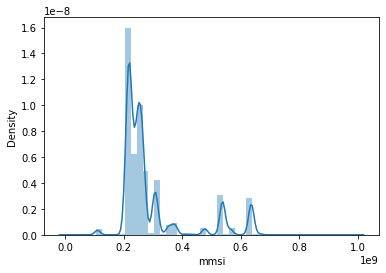

In [22]:
sns.distplot(data["mmsi"])
# lo que haría aqui es crear un bucle y guardar los gráficos en una carpeta

# Gráficos de violín columnas numéricas

<AxesSubplot:ylabel='mmsi'>

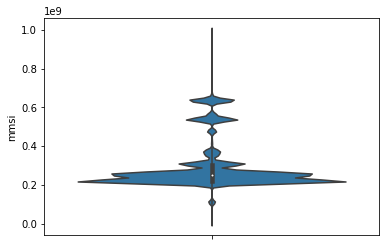

In [26]:
sns.violinplot(y=data["mmsi"])

# Gráficos de caja


<AxesSubplot:ylabel='mmsi'>

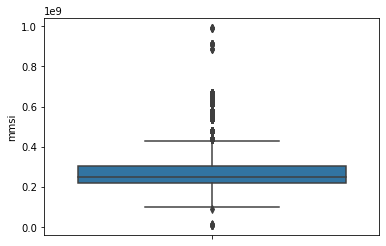

In [28]:
sns.boxplot(y= data["mmsi"])

# Conteo de los valores de las variables categóricas


In [33]:
data["navigationalstatus"].value_counts()

Under way using engine                                   307581
Unknown value                                             17259
Constrained by her draught                                12287
Engaged in fishing                                        10798
Moored                                                     4121
Reserved for future amendment [HSC]                        1872
Restricted maneuverability                                 1868
Under way sailing                                          1396
At anchor                                                   513
Power-driven vessel towing astern                           377
Power-driven vessel pushing ahead or towing alongside       236
Not under command                                            31
Reserved for future amendment [WIG]                          12
Name: navigationalstatus, dtype: int64

# Gráfico de barras variables categóricas

<AxesSubplot:xlabel='navigationalstatus', ylabel='count'>

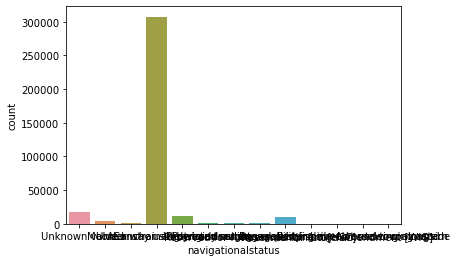

In [31]:
sns.countplot(x="navigationalstatus", data=data)

# Analisis bivariable de los datos

## Matriz de correlación de las variables numéricas
Por defecto, el método corr() utiliza el método Pearson para calcular el coeficiente de correlación. También podemos utilizar otros métodos como Kendall y spearman para calcular el coeficiente de correlación especificando el valor del parámetro method en el método corr.

<AxesSubplot:>

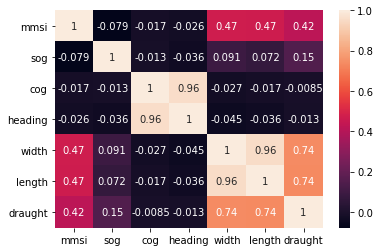

In [36]:
corr_df=data.corr(method='pearson')
sns.heatmap(corr_df, annot=True)


## Gráfico de dispersión de las variables numéricas enfrentadas


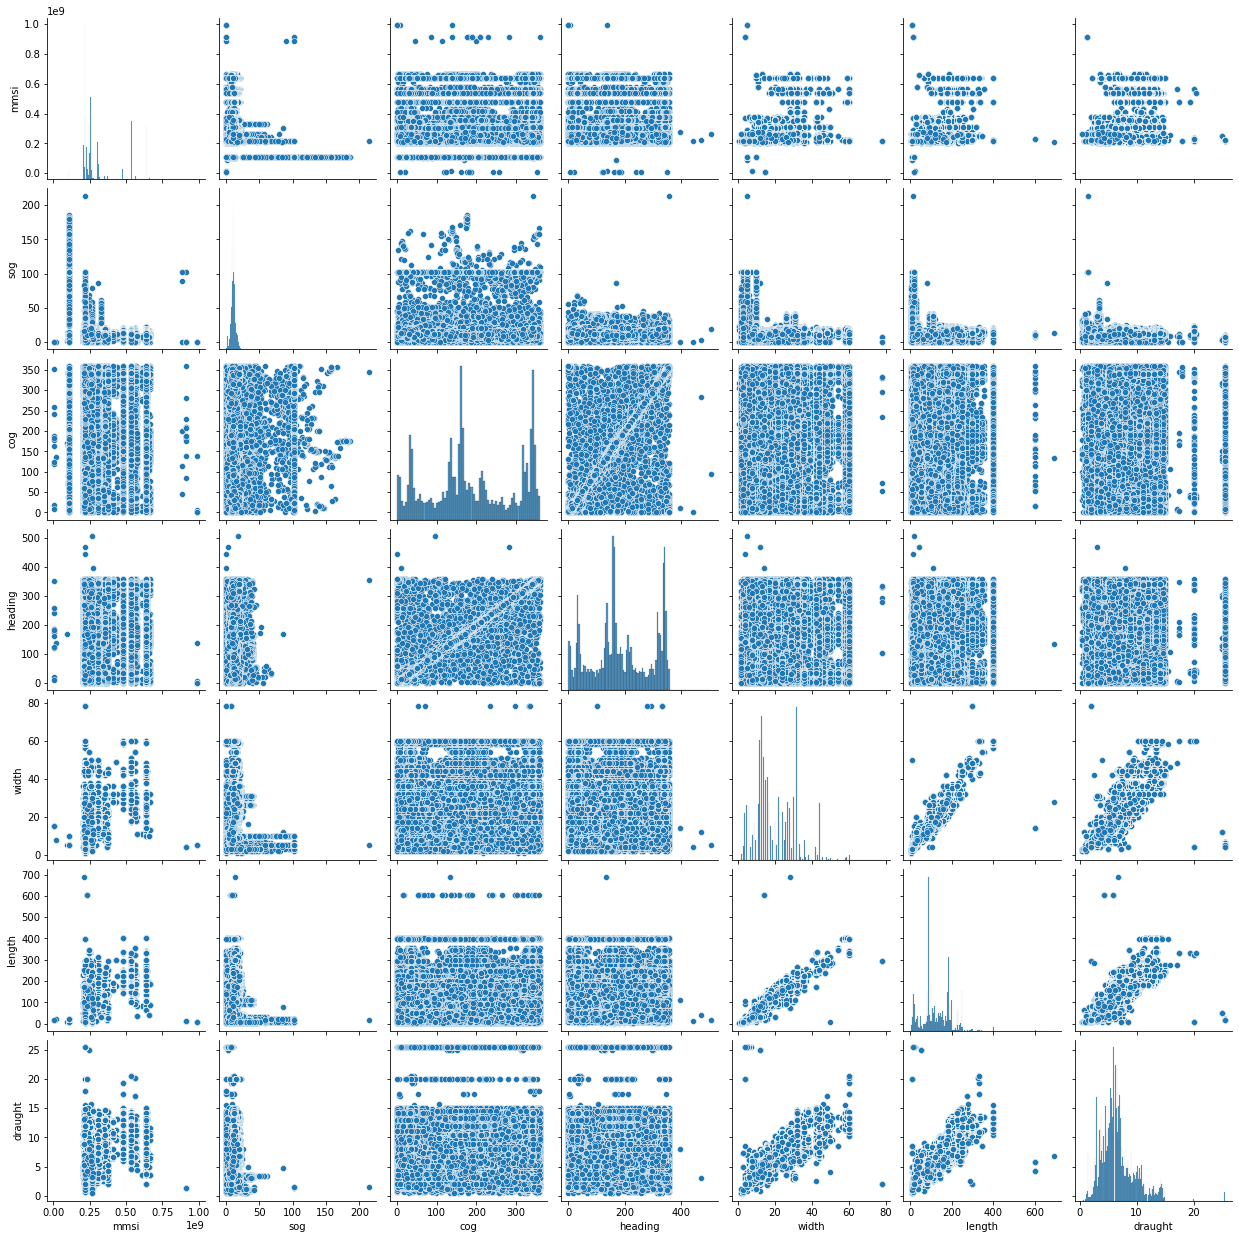

In [37]:
sns.pairplot(data)

c:\Users\jmald\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='draught', ylabel='length'>

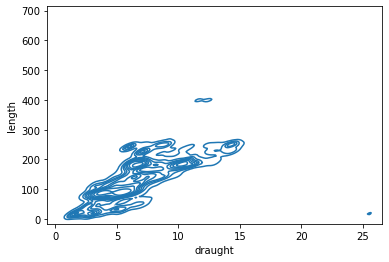

In [39]:
sns.kdeplot(data.draught, data.length)


# Análisis vibariable usando variables categóricas


<AxesSubplot:xlabel='length', ylabel='shiptype'>

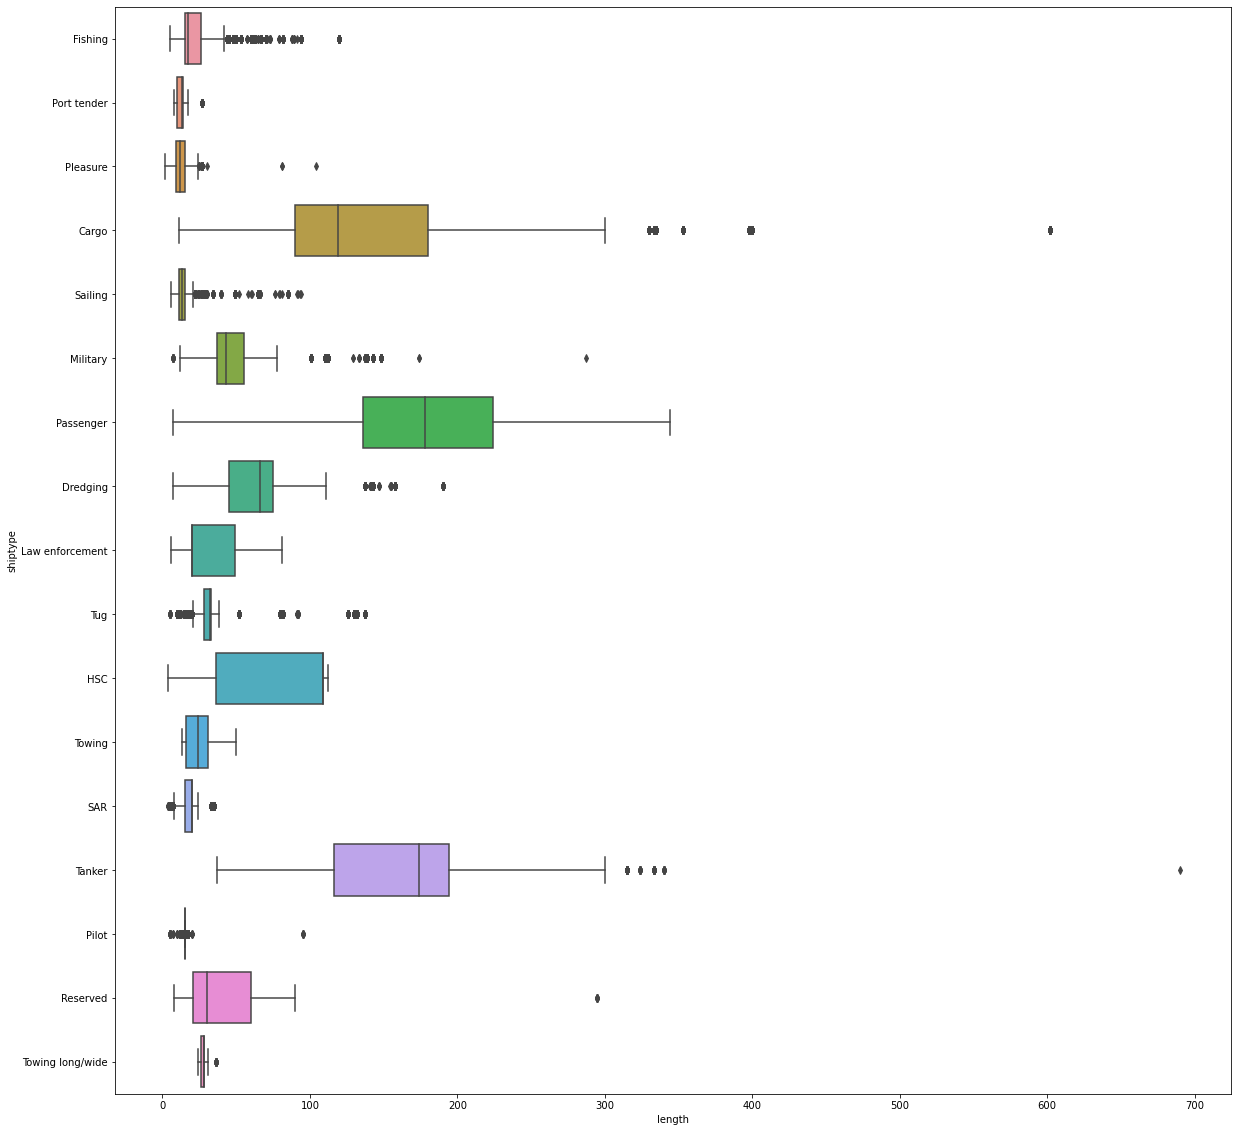

In [45]:
plt.figure(figsize=(20,20))

sns.boxplot(x="length", y="shiptype", data=data) #hue="shiptype",
# Como son demasiados se deberían hacer selecciones


In [46]:
# también se pueden ver relaciones usando colores en un diagrama de dispersión